<a href="https://colab.research.google.com/github/mohammadathania/ALY6110/blob/main/Individual_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 32 kB/s 
     |████████████████████████████████| 198 kB 47.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a834ad2369a5b8928024b0265e201a3aa149e47f642dcb311ba6a2ee859f57e0
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [5]:
import pyspark
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName('bostonhousing').getOrCreate()

In [11]:
#1. Read the given CSV file
boston_housing = spark.read.csv("BostonHousing.csv", inferSchema=True, header = True)


In [9]:
#2. Show the first 5 elements of your dataset
boston_housing.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [10]:
#3. Count number of observation in the given dataset
n_dataset = boston_housing.count()
n_dataset

506

In [12]:
#4. Show the Schema of your dataset
boston_housing.printSchema()


root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [14]:
#5. Drop the column "b" from your dataset
new_boston_housing = boston_housing.drop('b')
new_boston_housing.show(3)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8| 4.03|34.7|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
only showing top 3 rows



In [19]:
#6. Round all of the numerical columns into two decimal place
from pyspark.sql.functions import round,col
for c in boston_housing.columns:
    boston_housing = boston_housing.withColumn(c, round(c, 2))
boston_housing.show(3)

+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
only showing top 3 rows



In [22]:
#7. Create a new column (Age10)  with 10% increasing of 'age' column
boston_housing = boston_housing.withColumn("Age10",round(boston_housing.age * (1+(10/100)),2))
boston_housing.show(3)

+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|67.21|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
only showing top 3 rows



(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  3.19 ,  13.871,  24.552,  35.233,  45.914,  56.595,  67.276,
         77.957,  88.638,  99.319, 110.   ]),
 <a list of 10 Patch objects>)

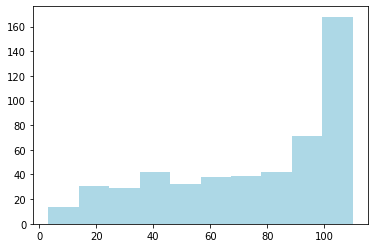

In [31]:
#8. Plot Age10 column on a 2D Plot
#!pip install pyspark-dist-explore

from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, boston_housing.select('Age10'), color=['lightblue'])


In [23]:
#9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)
boston_housing.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|              

In [29]:
#10. Convert  Spark Dataframe to Pandas Dataframe
pandas_boston = boston_housing.toPandas()
pandas_boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,392.83,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2,59.62


In [27]:
#11. Show the last 5 rows of Pandas DataFrame
pandas_boston.tail(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Age10
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,391.99,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,393.45,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,396.90,7.88,11.9,88.88
